In [8]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Initial Shape:", df.shape)
    print(df.info())
    return df

data = load_data('Sales.csv') 


Initial Shape: (750, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   750 non-null    object 
 1   Region    750 non-null    object 
 2   Sales     750 non-null    float64
 3   Profit    750 non-null    float64
 4   Discount  750 non-null    float64
 5   Category  750 non-null    object 
 6   Date      750 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.1+ KB
None


In [9]:
def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna(axis=0)  
    return df

data = clean_data(data)
print("Cleaned Shape:", data.shape)


Cleaned Shape: (750, 7)


In [10]:
from scipy.stats import zscore
df = pd.read_csv('Sales.csv') 

df = df[(zscore(df[['Sales', 'Profit']]) < 3).all(axis=1)]
print(df.shape)


(750, 7)


In [11]:
# Descriptive statistics for numerical columns
print(df[['Sales', 'Profit']].describe())


             Sales      Profit
count   750.000000  750.000000
mean    779.234787  172.981413
std     419.217655  129.649749
min      51.190000  -49.570000
25%     413.357500   59.760000
50%     777.670000  170.955000
75%    1138.415000  283.302500
max    1499.800000  398.780000


In [12]:
print("Sales Variance:", df['Sales'].var())
print("Profit Variance:", df['Profit'].var())

print("Sales Std Dev:", df['Sales'].std())
print("Profit Std Dev:", df['Profit'].std())


Sales Variance: 175743.44198600255
Profit Variance: 16809.05732243242
Sales Std Dev: 419.217654668792
Profit Std Dev: 129.6497486400665


In [14]:
# Pearson correlation between numerical variables
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix[['Sales', 'Profit']])


             Sales    Profit
Sales     1.000000 -0.021001
Profit   -0.021001  1.000000
Discount  0.046082  0.048216


C:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


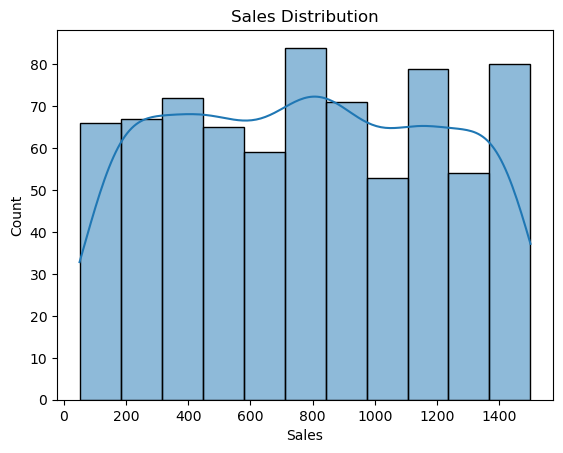

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()


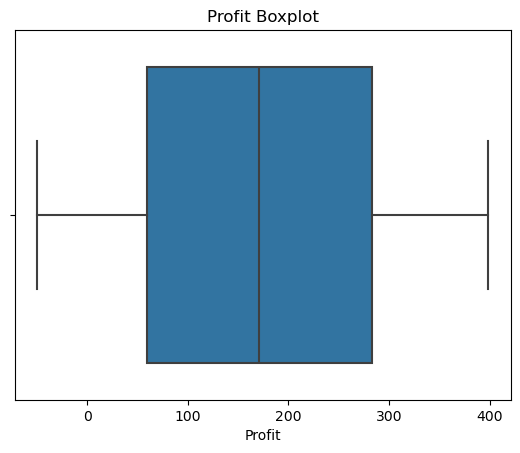

In [16]:
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()


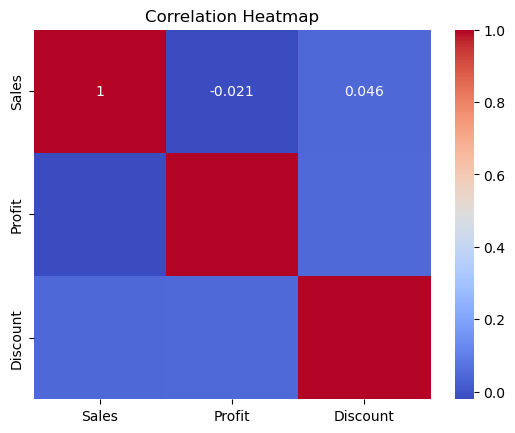

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [18]:
#PROJECT 2

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Sales.csv') 

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])


print(df.dtypes)
print(df.head())


Product             object
Region              object
Sales              float64
Profit             float64
Discount           float64
Category            object
Date        datetime64[ns]
dtype: object
    Product Region    Sales  Profit  Discount         Category       Date
0    Binder  South   566.22  146.62      0.09  Office Supplies 2023-02-10
1     Chair  South  1247.76   47.56      0.09        Furniture 2023-03-06
2    Binder   East   164.88   15.86      0.17  Office Supplies 2023-04-21
3  Bookcase  North   172.17  -34.61      0.27        Furniture 2023-01-03
4     Phone   West  1078.86   -6.92      0.05       Technology 2023-01-25


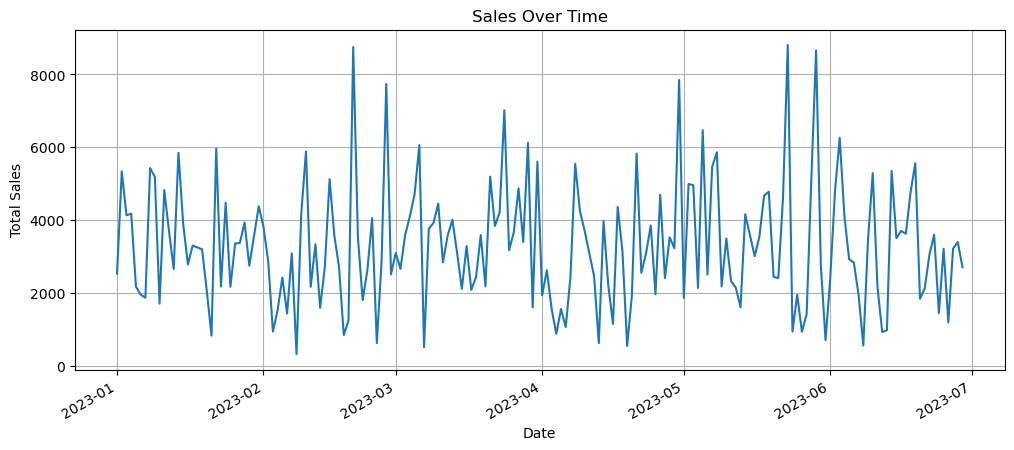

In [23]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset (replace path if needed)
sales = pd.read_csv('Sales.csv')  

# 3. Convert the 'Date' column to datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

sales.groupby('Date')['Sales'].sum().plot(figsize=(12, 5), title='Sales Over Time')
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()


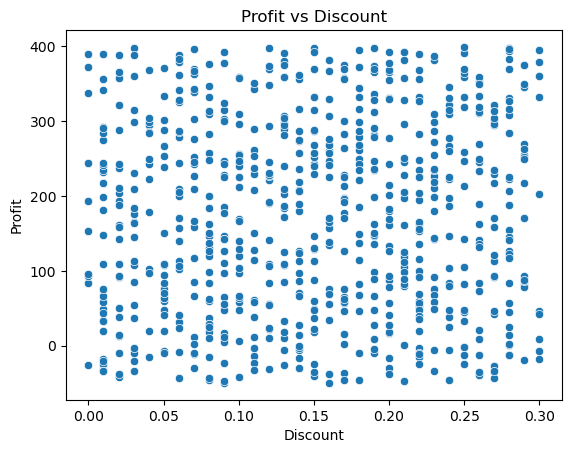

In [24]:
sns.scatterplot(x='Discount', y='Profit', data=sales)
plt.title("Profit vs Discount")
plt.show()
